### Import Modul

In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras

from sklearn.metrics import confusion_matrix, classification_report

### Import Data

#### Data Training

**Load Data Training Hasil Encode** (Belum dinormalisasi)

In [32]:
train = pd.read_excel('D:/Code/py_code/Artificial-Neural-Network/Single-Layer-Perceptron/Data Training.xlsx', sheet_name='Hasil Encode', index_col=0)
x_train = train.iloc[:, 2:].values
y_train = train.iloc[:, 1].values
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


**Load Data Training Hasil Normalisasi**

In [33]:
train_normalize = pd.read_excel('D:/Code/py_code/Artificial-Neural-Network/Single-Layer-Perceptron/Data Training.xlsx', sheet_name='Normalisasi', index_col=0)
x_train_normalize = train_normalize.iloc[:, 1:-1].values
y_train_normalize = train_normalize.iloc[:, -1].values
train_normalize.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1.0,1,0.271174,0.2,0.0,0.014151,1.0,0
1,2,0.0,0,0.472229,0.2,0.0,0.139136,0.0,1
2,3,1.0,0,0.321438,0.0,0.0,0.015469,1.0,1
3,4,0.0,0,0.434531,0.2,0.0,0.103644,1.0,1
4,5,1.0,1,0.434531,0.0,0.0,0.015713,1.0,0


#### Data Testing

**Load Data Testing Hasil Encode** (Belum dinormalisasi)

In [34]:
test = pd.read_excel('D:/Code/py_code/Artificial-Neural-Network/Single-Layer-Perceptron/Data Testing.xlsx', sheet_name='Hasil Encode', index_col=0)

label = pd.read_csv("D:/Code/py_code/Artificial-Neural-Network/Single-Layer-Perceptron/data/test_data_GroundTruth_cl.csv")

x_test = test.iloc[:, 1:].values
y_test = label['Survived'].values

test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


**Load Data Training Hasil Normalisasi**

In [35]:
test_normalize = pd.read_excel('D:/Code/py_code/Artificial-Neural-Network/Single-Layer-Perceptron/Data Testing.xlsx', sheet_name='Normalisasi', index_col=0)
x_test_normalize = test_normalize.iloc[:, 1:-1].values
y_test_normalize = test_normalize.iloc[:, -1].values
test_normalize.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,1.0,1,0.452723,0.000,0.000000,0.015282,0.5,0
1,893,1.0,0,0.617566,0.125,0.000000,0.013663,1.0,1
2,894,0.5,1,0.815377,0.000,0.000000,0.018909,0.5,0
3,895,1.0,1,0.353818,0.000,0.000000,0.016908,1.0,0
4,896,1.0,0,0.287881,0.125,0.166667,0.023984,1.0,1


### Visualisasi Plot Confussion Matrix

In [36]:
def plot_cm(matrix, title): 
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    ax.xaxis.set_ticklabels(['Not Survived', 'Survived']);ax.yaxis.set_ticklabels(['Not Survived', 'Survived'])
    plt.show()

### Pembuatan Model Single Layer Perceptron

In [37]:
lr = 0.01
epochs = 1000

#### **Model Tensorflow**

In [38]:
optimizer = keras.optimizers.SGD(learning_rate=0.01)
keras.utils.set_random_seed(42)
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[len(x_train[0])], activation='sigmoid', kernel_initializer='random_uniform')])
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 8         
                                                                 
Total params: 8 (32.00 Byte)
Trainable params: 8 (32.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
weights = model.get_weights()
weights

[array([[ 0.03581891],
        [ 0.01626286],
        [-0.01412892],
        [ 0.04499895],
        [-0.04219389],
        [ 0.01523323],
        [ 0.04704999]], dtype=float32),
 array([0.], dtype=float32)]

In [40]:
model.fit(x_train_normalize, y_train_normalize, epochs=epochs)

predict = model.predict(x_test_normalize)
predict = np.round(predict)
predict = predict.astype(int)
predict = predict.reshape(1, -1)[0]

Epoch 1/1000


23/23 [==============================] - 0s 1ms/step - loss: 0.2544 - accuracy: 0.3778
Epoch 2/1000
23/23 [==============================] - 0s 920us/step - loss: 0.2496 - accuracy: 0.5225
Epoch 3/1000
23/23 [==============================] - 0s 857us/step - loss: 0.2457 - accuracy: 0.5941
Epoch 4/1000
23/23 [==============================] - 0s 870us/step - loss: 0.2423 - accuracy: 0.5955
Epoch 5/1000
23/23 [==============================] - 0s 826us/step - loss: 0.2390 - accuracy: 0.5955
Epoch 6/1000
23/23 [==============================] - 0s 818us/step - loss: 0.2363 - accuracy: 0.5955
Epoch 7/1000
23/23 [==============================] - 0s 819us/step - loss: 0.2339 - accuracy: 0.5955
Epoch 8/1000
23/23 [==============================] - 0s 848us/step - loss: 0.2319 - accuracy: 0.5955
Epoch 9/1000
23/23 [==============================] - 0s 825us/step - loss: 0.2299 - accuracy: 0.5955
Epoch 10/1000
23/23 [==============================] - 0s 863us/step - loss: 0.2283 - accuracy: 0

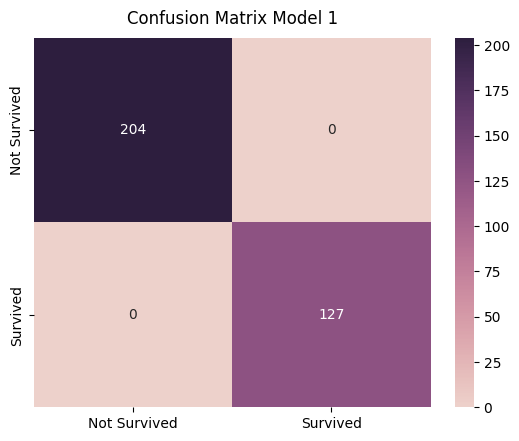

In [41]:
model1_cf1 = confusion_matrix(y_test_normalize, predict)
plot_cm(model1_cf1, 'Model 1')

In [42]:
model1_report = classification_report(y_test_normalize, predict, output_dict=True, target_names=['Not Survived',"Survived"])
pd.DataFrame(model1_report).transpose()

,precision,recall,f1-score,support
Not Survived,1.0,1.0,1.0,204.0
Survived,1.0,1.0,1.0,127.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,331.0
weighted avg,1.0,1.0,1.0,331.0


#### **Model Binary Step**

In [43]:
class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate, epochs):
        np.random.seed(42)
        self.weights = np.random.uniform(-0.3,0.3, size=input_size+1)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def _activation_function(self, x):
        return 1 if x >= 0 else 0

    def _predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self._activation_function(summation)

    def _calculate_accuracy(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy * 100

    def train(self, X_train, y_train):
        for epoch in range(self.epochs):
            for inputs, label in zip(X_train, y_train):
                prediction = self._predict(inputs)

                # Update weights
                error = label - prediction
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error

            # Calculate training accuracy at each epoch
            training_accuracy = self._calculate_accuracy(X_train, y_train)
            print(f"Epoch {epoch + 1}/{self.epochs}: Training Accuracy = {training_accuracy:.2f}%")

    def predict(self, X_test):
        predictions = [self._predict(inputs) for inputs in X_test]
        return np.array(predictions)
    
    def get_weights(self):
        return self.weights

##### **Data dinormalisasi**

In [44]:
input_size = x_train.shape[1]
perceptron = SingleLayerPerceptron(input_size, learning_rate=lr, epochs=epochs)
perceptron.train(x_train_normalize, y_train_normalize)
pred = perceptron.predict(x_test_normalize)

Epoch 1/1000: Training Accuracy = 72.19%
Epoch 2/1000: Training Accuracy = 78.23%
Epoch 3/1000: Training Accuracy = 73.74%
Epoch 4/1000: Training Accuracy = 78.09%
Epoch 5/1000: Training Accuracy = 76.12%
Epoch 6/1000: Training Accuracy = 78.23%
Epoch 7/1000: Training Accuracy = 76.97%
Epoch 8/1000: Training Accuracy = 79.35%
Epoch 9/1000: Training Accuracy = 79.21%
Epoch 10/1000: Training Accuracy = 74.72%
Epoch 11/1000: Training Accuracy = 75.84%
Epoch 12/1000: Training Accuracy = 76.54%
Epoch 13/1000: Training Accuracy = 75.98%
Epoch 14/1000: Training Accuracy = 80.48%
Epoch 15/1000: Training Accuracy = 79.63%
Epoch 16/1000: Training Accuracy = 79.07%
Epoch 17/1000: Training Accuracy = 76.83%
Epoch 18/1000: Training Accuracy = 79.07%
Epoch 19/1000: Training Accuracy = 77.11%
Epoch 20/1000: Training Accuracy = 80.34%
Epoch 21/1000: Training Accuracy = 78.93%
Epoch 22/1000: Training Accuracy = 74.72%
Epoch 23/1000: Training Accuracy = 76.69%
Epoch 24/1000: Training Accuracy = 78.37%
E

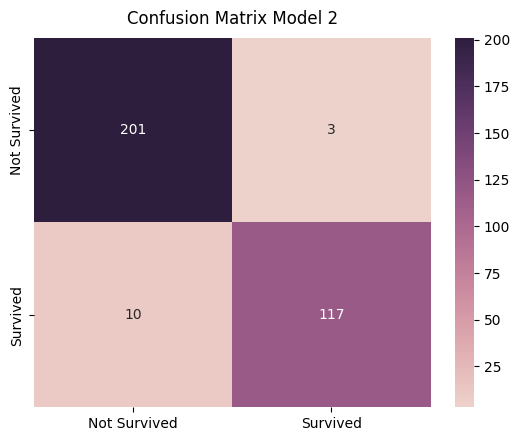

In [45]:
model2_cf = confusion_matrix(y_test_normalize, pred)
plot_cm(model2_cf, 'Model 2')

In [46]:
model2_report = classification_report(y_test_normalize, pred, output_dict=True, target_names=['Not Survived',"Survived"])
pd.DataFrame(model2_report).transpose()

,precision,recall,f1-score,support
Not Survived,0.952607,0.985294,0.968675,204.000000
Survived,0.975000,0.921260,0.947368,127.000000
accuracy,0.960725,0.960725,0.960725,0.960725
macro avg,0.963803,0.953277,0.958022,331.000000
weighted avg,0.961199,0.960725,0.960500,331.000000


##### **Data tidak dinormalisasi**

In [47]:
input_size_2 = x_train.shape[1]
perceptron_2 = SingleLayerPerceptron(input_size_2, learning_rate=lr, epochs=epochs)
perceptron_2.train(x_train, y_train)
pred_2 = perceptron_2.predict(x_test)

Epoch 1/1000: Training Accuracy = 68.68%
Epoch 2/1000: Training Accuracy = 68.96%
Epoch 3/1000: Training Accuracy = 71.91%
Epoch 4/1000: Training Accuracy = 69.24%
Epoch 5/1000: Training Accuracy = 70.79%
Epoch 6/1000: Training Accuracy = 70.51%
Epoch 7/1000: Training Accuracy = 58.85%
Epoch 8/1000: Training Accuracy = 66.15%
Epoch 9/1000: Training Accuracy = 67.98%
Epoch 10/1000: Training Accuracy = 69.52%
Epoch 11/1000: Training Accuracy = 69.94%
Epoch 12/1000: Training Accuracy = 67.42%
Epoch 13/1000: Training Accuracy = 67.98%
Epoch 14/1000: Training Accuracy = 73.88%
Epoch 15/1000: Training Accuracy = 68.40%
Epoch 16/1000: Training Accuracy = 72.33%
Epoch 17/1000: Training Accuracy = 72.47%
Epoch 18/1000: Training Accuracy = 76.12%
Epoch 19/1000: Training Accuracy = 74.30%
Epoch 20/1000: Training Accuracy = 70.08%
Epoch 21/1000: Training Accuracy = 73.31%
Epoch 22/1000: Training Accuracy = 71.07%
Epoch 23/1000: Training Accuracy = 74.16%
Epoch 24/1000: Training Accuracy = 71.21%
E

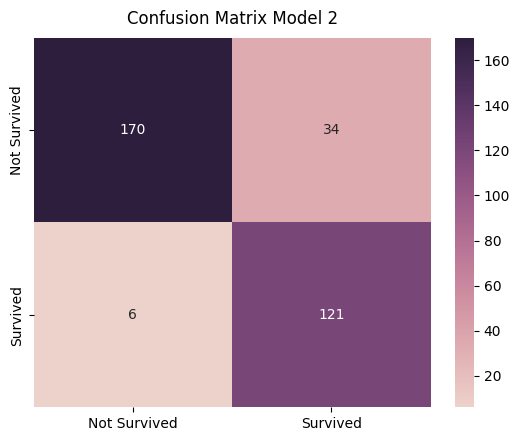

In [48]:
model2_cf2 = confusion_matrix(y_test, pred_2)
plot_cm(model2_cf2, 'Model 2')

In [49]:
model2_report2 = classification_report(y_test, pred_2, output_dict=True, target_names=['Not Survived',"Survived"])
pd.DataFrame(model2_report2).transpose()

,precision,recall,f1-score,support
Not Survived,0.965909,0.833333,0.894737,204.000000
Survived,0.780645,0.952756,0.858156,127.000000
accuracy,0.879154,0.879154,0.879154,0.879154
macro avg,0.873277,0.893045,0.876446,331.000000
weighted avg,0.894826,0.879154,0.880701,331.000000


##### **Menggunakan kolom Sex & Age saja**

In [50]:
# data train 2 kolom
x_train_2col = train_normalize.iloc[:, 2:4].values
y_train_2col = train_normalize.iloc[:, -1].values

# data test 2 kolom
x_test_2col = test_normalize.iloc[:, 2:4].values
y_test_2col = test_normalize.iloc[:, -1].values

In [51]:
input_size = x_train_2col.shape[1]
perceptron_2col = SingleLayerPerceptron(input_size, learning_rate=lr, epochs=epochs)
perceptron_2col.train(x_train_2col, y_train_2col)
pred_2col = perceptron_2col.predict(x_test_2col)

Epoch 1/1000: Training Accuracy = 75.98%
Epoch 2/1000: Training Accuracy = 77.67%
Epoch 3/1000: Training Accuracy = 75.56%
Epoch 4/1000: Training Accuracy = 75.98%
Epoch 5/1000: Training Accuracy = 75.98%
Epoch 6/1000: Training Accuracy = 77.67%
Epoch 7/1000: Training Accuracy = 75.56%
Epoch 8/1000: Training Accuracy = 77.95%
Epoch 9/1000: Training Accuracy = 77.67%
Epoch 10/1000: Training Accuracy = 75.98%
Epoch 11/1000: Training Accuracy = 75.98%
Epoch 12/1000: Training Accuracy = 77.67%
Epoch 13/1000: Training Accuracy = 75.56%
Epoch 14/1000: Training Accuracy = 77.95%
Epoch 15/1000: Training Accuracy = 77.67%
Epoch 16/1000: Training Accuracy = 77.95%
Epoch 17/1000: Training Accuracy = 77.95%
Epoch 18/1000: Training Accuracy = 77.67%
Epoch 19/1000: Training Accuracy = 77.95%
Epoch 20/1000: Training Accuracy = 77.95%
Epoch 21/1000: Training Accuracy = 77.67%
Epoch 22/1000: Training Accuracy = 77.95%
Epoch 23/1000: Training Accuracy = 77.95%
Epoch 24/1000: Training Accuracy = 77.95%
E

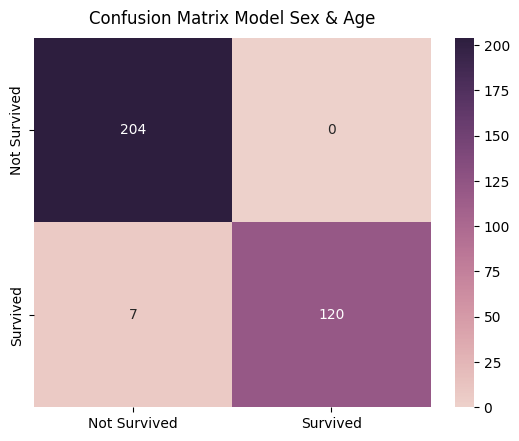

In [52]:
model_cf_2col = confusion_matrix(y_test_2col, pred_2col)
plot_cm(model_cf_2col, 'Model Sex & Age')

In [53]:
model_report_2col = classification_report(y_test_2col, pred_2col, output_dict=True, target_names=['Not Survived',"Survived"])
pd.DataFrame(model_report_2col).transpose()

,precision,recall,f1-score,support
Not Survived,0.966825,1.000000,0.983133,204.000000
Survived,1.000000,0.944882,0.971660,127.000000
accuracy,0.978852,0.978852,0.978852,0.978852
macro avg,0.983412,0.972441,0.977396,331.000000
weighted avg,0.979554,0.978852,0.978731,331.000000


#### **Model Binary Sigmoid**

In [54]:
class SingleLayerPerceptronSigmoid:
    def __init__(self, input_size, learning_rate, epochs):
        np.random.seed(42)
        self.weights = np.random.uniform(-0.3,0.3, size=input_size+1)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def _activation_function(self, x):
        return 1 / (1 + np.exp(-x))
    
    def _activation_function_derivative(self, x):
        return self._activation_function(x) * (1 - self._activation_function(x))

    def _predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self._activation_function(summation)

    def _calculate_accuracy(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy * 100

    def train(self, X_train, y_train):
        for epoch in range(self.epochs):
            for inputs, label in zip(X_train, y_train):
                prediction = self._predict(inputs)

                # Update weights
                error = label - prediction
                adjustment = error * self._activation_function_derivative(prediction)

                self.weights[1:] += self.learning_rate * adjustment * inputs
                self.weights[0] += self.learning_rate * adjustment

            # Calculate training accuracy at each epoch
            training_accuracy = self._calculate_accuracy(X_train, y_train)
            print(f"Epoch {epoch + 1}/{self.epochs}: Training Accuracy = {training_accuracy:.2f}%")

    def predict(self, X_test):
        predictions = [np.round(self._predict(inputs)) for inputs in X_test]
        return np.array(predictions)
    
    def get_weights(self):
        return self.weights

In [55]:
input_size = x_train_normalize.shape[1]
p = SingleLayerPerceptronSigmoid(input_size, learning_rate=lr, epochs=epochs)
p.train(x_train_normalize, y_train_normalize)
predict = p.predict(x_test_normalize)

Epoch 1/1000: Training Accuracy = 59.55%
Epoch 2/1000: Training Accuracy = 59.55%
Epoch 3/1000: Training Accuracy = 59.55%
Epoch 4/1000: Training Accuracy = 59.55%
Epoch 5/1000: Training Accuracy = 63.20%
Epoch 6/1000: Training Accuracy = 69.66%
Epoch 7/1000: Training Accuracy = 75.56%
Epoch 8/1000: Training Accuracy = 78.37%
Epoch 9/1000: Training Accuracy = 79.07%
Epoch 10/1000: Training Accuracy = 79.21%
Epoch 11/1000: Training Accuracy = 78.93%
Epoch 12/1000: Training Accuracy = 79.21%
Epoch 13/1000: Training Accuracy = 78.37%
Epoch 14/1000: Training Accuracy = 77.95%
Epoch 15/1000: Training Accuracy = 78.23%
Epoch 16/1000: Training Accuracy = 78.65%
Epoch 17/1000: Training Accuracy = 78.51%
Epoch 18/1000: Training Accuracy = 77.95%
Epoch 19/1000: Training Accuracy = 78.23%
Epoch 20/1000: Training Accuracy = 78.09%
Epoch 21/1000: Training Accuracy = 77.95%
Epoch 22/1000: Training Accuracy = 77.95%
Epoch 23/1000: Training Accuracy = 77.95%
Epoch 24/1000: Training Accuracy = 77.95%
E

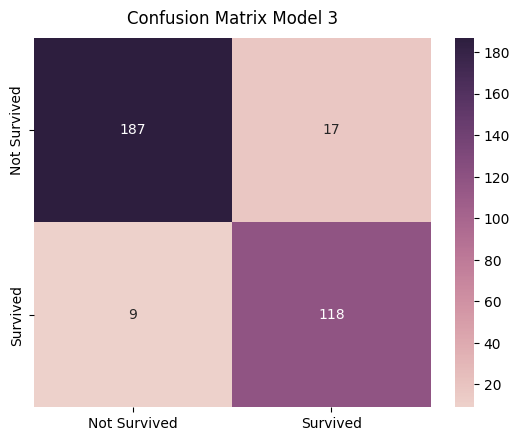

In [62]:
model3_cf = confusion_matrix(y_test_normalize, predict)
plot_cm(model3_cf, 'Model 3')

In [63]:
model3_report = classification_report(y_test_normalize, predict, output_dict=True, target_names=['Not Survived',"Survived"])
pd.DataFrame(model3_report).transpose()

,precision,recall,f1-score,support
Not Survived,0.954082,0.916667,0.935000,204.00000
Survived,0.874074,0.929134,0.900763,127.00000
accuracy,0.921450,0.921450,0.921450,0.92145
macro avg,0.914078,0.922900,0.917882,331.00000
weighted avg,0.923384,0.921450,0.921864,331.00000
